Read the `NYC_Data.csv` from the folder

In [35]:
import pandas as pd

read_dataframe = pd.read_csv('NYC_Data.csv')


In [36]:
read_dataframe.shape

(48895, 16)

In [3]:
# Find out the shape of the dataset, dependent columns and independent columns:

read_dataframe.shape, read_dataframe.columns,

((48895, 16),
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'],
       dtype='object'))

Finding out the unique columns in each row: 
means `each unique elements for the given columns`


In [4]:
read_dataframe.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Seperating the dependent and independent features:

In [5]:
X = read_dataframe.drop('price', axis = 1)
y = read_dataframe['price']



In [6]:
X.shape, X.columns, y.shape

((48895, 15),
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
        'number_of_reviews', 'last_review', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365'],
       dtype='object'),
 (48895,))

In [7]:
y.unique().sum() # this means price is a continuous feature: 

# This is also dependent feature of the given dataset.

np.int64(473660)

Now seperating, numerical columns, and categorical columns: 

In [8]:
'''
So for extracting the datatypes from the given dataframe of pandas
1. We use select_dtypes method( and arguments with include or exclude = ['Object, number, bool'])


'''

X_numeric = X.select_dtypes(include = ['number'])  # This returns the data frame with numeric columns 

X_categoric = X.select_dtypes(exclude = ['number'])

In [9]:
# print the dataframes

X_numeric, X_numeric.shape

(             id   host_id  latitude  longitude  minimum_nights  \
 0          2539      2787  40.64749  -73.97237               1   
 1          2595      2845  40.75362  -73.98377               1   
 2          3647      4632  40.80902  -73.94190               3   
 3          3831      4869  40.68514  -73.95976               1   
 4          5022      7192  40.79851  -73.94399              10   
 ...         ...       ...       ...        ...             ...   
 48890  36484665   8232441  40.67853  -73.94995               2   
 48891  36485057   6570630  40.70184  -73.93317               4   
 48892  36485431  23492952  40.81475  -73.94867              10   
 48893  36485609  30985759  40.75751  -73.99112               1   
 48894  36487245  68119814  40.76404  -73.98933               7   
 
        number_of_reviews  reviews_per_month  calculated_host_listings_count  \
 0                      9               0.21                               6   
 1                     45         

In [10]:
X_categoric, X_categoric.shape

(                                                    name      host_name  \
 0                     Clean & quiet apt home by the park           John   
 1                                  Skylit Midtown Castle       Jennifer   
 2                    THE VILLAGE OF HARLEM....NEW YORK !      Elisabeth   
 3                        Cozy Entire Floor of Brownstone    LisaRoxanne   
 4       Entire Apt: Spacious Studio/Loft by central park          Laura   
 ...                                                  ...            ...   
 48890    Charming one bedroom - newly renovated rowhouse        Sabrina   
 48891      Affordable room in Bushwick/East Williamsburg        Marisol   
 48892            Sunny Studio at Historical Neighborhood  Ilgar & Aysel   
 48893               43rd St. Time Square-cozy single bed            Taz   
 48894  Trendy duplex in the very heart of Hell's Kitchen     Christophe   
 
       neighbourhood_group       neighbourhood        room_type last_review  
 0      

Now working with the numeric columns, `Feature Engineering, Feature Selection` and so on.

In [11]:
# Pull the numeric columns , Buddy!


In [12]:
X_numeric.shape, X_numeric.nunique()

((48895, 9),
 id                                48895
 host_id                           37457
 latitude                          19048
 longitude                         14718
 minimum_nights                      109
 number_of_reviews                   394
 reviews_per_month                   937
 calculated_host_listings_count       47
 availability_365                    366
 dtype: int64)

In [13]:
X_numeric.isna().sum()

id                                    0
host_id                               0
latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Listen!

We should know that reviews_per_month which has more than 10k nan values, mean, this are relevant condition 
that gives some hint to learn about the dataset, so we put them with zero, since nan, means basically, there were
no review given by the users or visitors in that place.

In [14]:
X_numeric = X_numeric.fillna(value = '0')
X_numeric.isna().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
X_numeric.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1250.000000,629.000000,327.000000,365.000000


In [16]:
X_numeric

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,3,0,0,1,365
3,3831,4869,40.68514,-73.95976,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,10,9,0.1,1,0
...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,2,0,0,2,9
48891,36485057,6570630,40.70184,-73.93317,4,0,0,2,36
48892,36485431,23492952,40.81475,-73.94867,10,0,0,1,27
48893,36485609,30985759,40.75751,-73.99112,1,0,0,6,2


Drop the columns that is not of much importance or not at all.

In our NYC dataset we had two columns that is `id` and `host id` which is of no use, since
they doesnot carry any meaning to the dataset



In [17]:
X_numeric = X_numeric.drop(['id', 'host_id'], axis = 1,)


In [18]:
X_numeric

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
2,40.80902,-73.94190,3,0,0,1,365
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.1,1,0
...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0,2,9
48891,40.70184,-73.93317,4,0,0,2,36
48892,40.81475,-73.94867,10,0,0,1,27
48893,40.75751,-73.99112,1,0,0,6,2


In [19]:
X_numeric.describe()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,327.000000,365.000000


In [20]:
# Find the skew and kurtosis of the numeric_columns of the datasest

X_numeric.skew()

latitude                           0.237167
longitude                           1.28421
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.300723
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: object

In [21]:
X_numeric.kurtosis()

latitude                            0.148845
longitude                           5.021646
minimum_nights                    854.071662
number_of_reviews                  19.529788
reviews_per_month                  43.531611
calculated_host_listings_count     67.550888
availability_365                   -0.997534
dtype: object

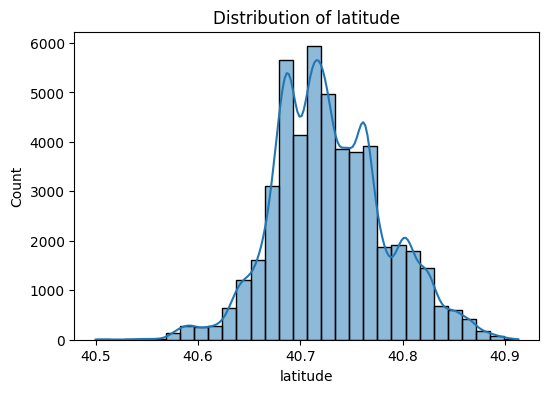

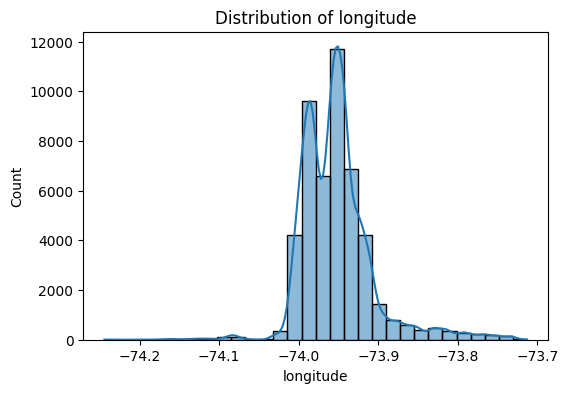

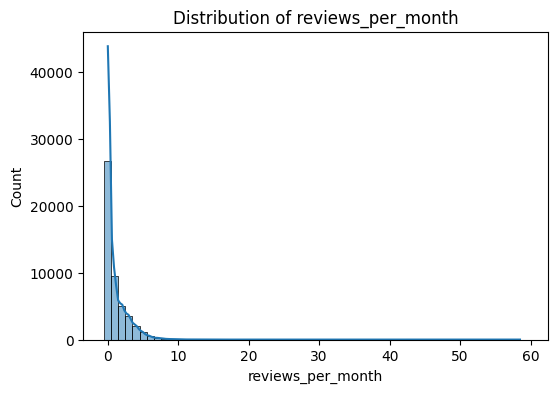

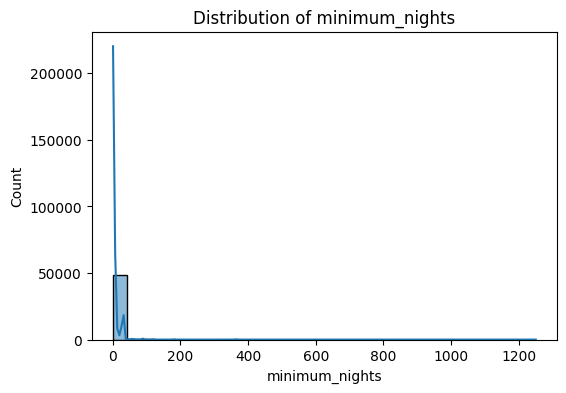

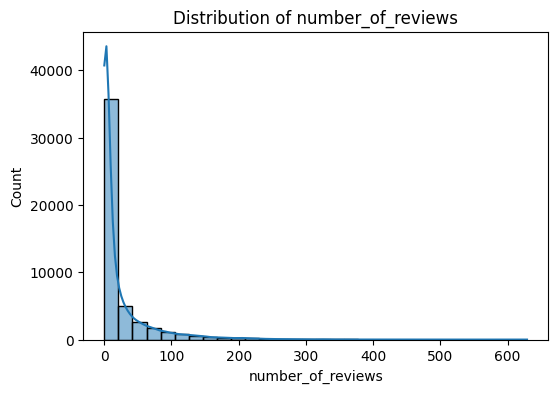

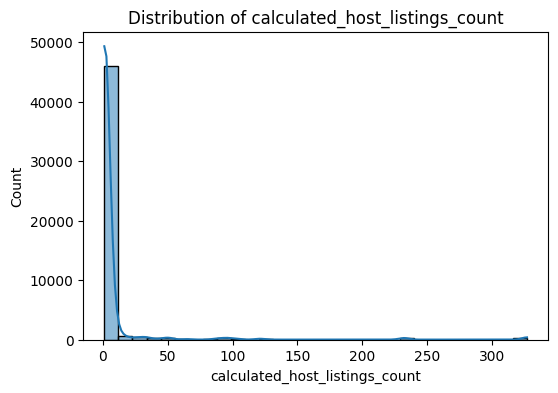

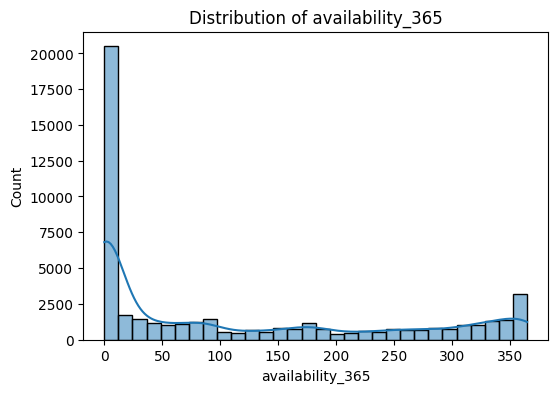

In [22]:


import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['latitude', 'longitude', 'reviews_per_month',  'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', ]  # add your numeric columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_numeric[col], kde=True, bins=30)  # histogram + density
    plt.title(f'Distribution of {col}')
    plt.show()


X_numeric.skew()

In [23]:
X_numeric.skew()

latitude                           0.237167
longitude                           1.28421
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.300723
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: object

`Condition for skewness feature that need a transoformation`

*  -0.5 < skew <0.5 # no transformation needed 
* Extremely skewed (>10): minimum_nights → log1p(x) or x^(1/3)
* High skew (1–10)  , log1p(x)
* Moderate skew (~0.5–1),   optional sqrt, otherwise leave

In [24]:
import numpy as np
X_numeric['minimum_nights'] = np.log1p(X_numeric['minimum_nights'])




X_numeric['reviews_per_month'] = pd.to_numeric(X_numeric['reviews_per_month'], errors='coerce')
X_numeric['reviews_per_month'] = np.log1p(X_numeric['reviews_per_month'])

X_numeric['number_of_reviews'] = pd.to_numeric(X_numeric['number_of_reviews'], errors='coerce')
X_numeric['number_of_reviews'] = np.log1p(X_numeric['number_of_reviews'])

X_numeric['calculated_host_listings_count'] = np.log1p(X_numeric['calculated_host_listings_count'])







In [25]:
X_numeric['calculated_host_listings_count'].dtype


dtype('float64')

IF any feaure column has the object type then u cant use transformation, so we must 
convert to the numpy arrays or numeric type for doing numpy operation:


In [26]:
X_numeric.skew()

latitude                          0.237167
longitude                         1.284210
minimum_nights                    1.498510
number_of_reviews                 0.362924
reviews_per_month                 0.950423
calculated_host_listings_count    3.279837
availability_365                  0.763408
dtype: float64

In [27]:
X_numeric.isna().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

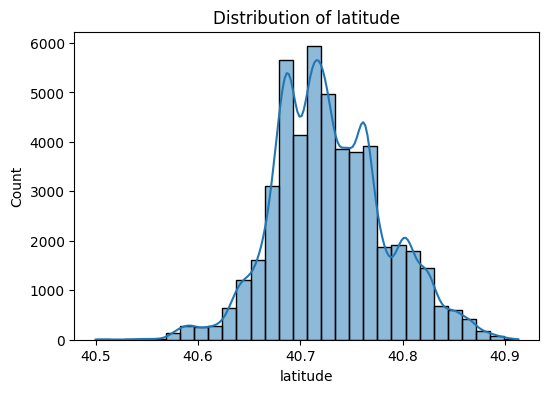

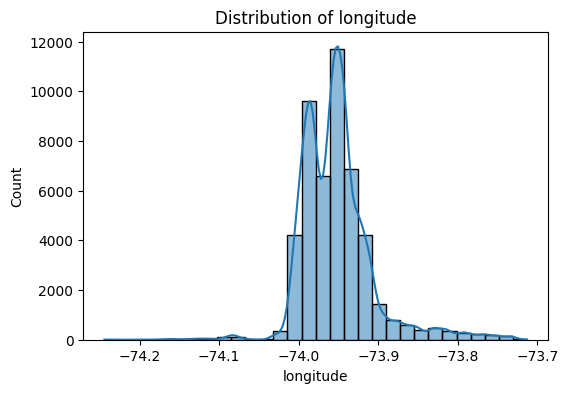

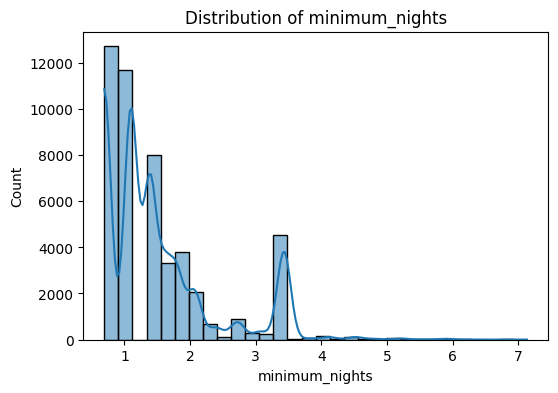

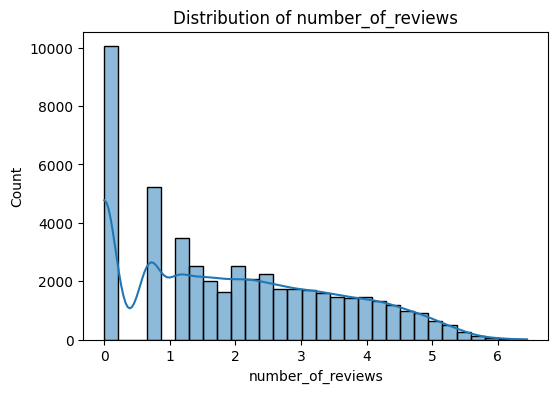

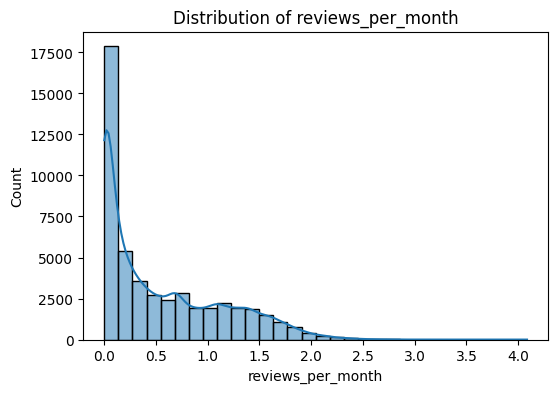

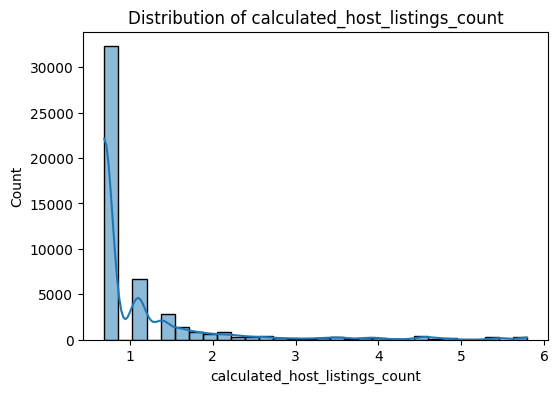

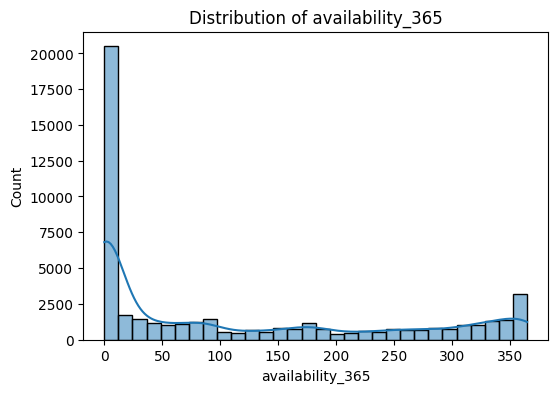

In [28]:
for col in X_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(X_numeric[col], kde=True, bins=30)  # histogram + density
    plt.title(f'Distribution of {col}')
    plt.show()

In [29]:
X_numeric.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.032987,-0.029572,-0.026565,0.032135,-0.010983
longitude,0.084788,1.000000,-0.126381,0.080434,0.134868,-0.042160,0.082731
minimum_nights,0.032987,-0.126381,1.000000,-0.221071,-0.294625,0.344036,0.178339
number_of_reviews,-0.029572,0.080434,-0.221071,1.000000,0.760737,-0.095789,0.171066
reviews_per_month,-0.026565,0.134868,-0.294625,0.760737,1.000000,-0.033615,0.197450
calculated_host_listings_count,0.032135,-0.042160,0.344036,-0.095789,-0.033615,1.000000,0.398314
availability_365,-0.010983,0.082731,0.178339,0.171066,0.197450,0.398314,1.000000


In [30]:
X_numeric.kurtosis()

latitude                           0.148845
longitude                          5.021646
minimum_nights                     1.983233
number_of_reviews                 -0.929407
reviews_per_month                 -0.108499
calculated_host_listings_count    11.796902
availability_365                  -0.997534
dtype: float64

Kurtosis greater than `4` apply the transformation for the feature columns: 



In [31]:

# Cube root transform
X_numeric['calculated_host_listings_count'] = np.cbrt(X_numeric['calculated_host_listings_count'])



In [32]:
from scipy.stats.mstats import winsorize

X_numeric['longitude'] = winsorize(X_numeric['longitude'], limits=[0.01, 0.01])


In [33]:
X_numeric.kurtosis()

latitude                          0.148845
longitude                         3.599412
minimum_nights                    1.983233
number_of_reviews                -0.929407
reviews_per_month                -0.108499
calculated_host_listings_count    4.992698
availability_365                 -0.997534
dtype: float64

In [34]:
X_numeric.skew()

latitude                          0.237167
longitude                         1.555471
minimum_nights                    1.498510
number_of_reviews                 0.362924
reviews_per_month                 0.950423
calculated_host_listings_count    2.237051
availability_365                  0.763408
dtype: float64

In [35]:
y = np.log1p(y)

In [36]:
y.skew(), y.kurtosis()

(np.float64(0.5531045462041365), np.float64(1.7427227060507082))

# Now Working with categorical columns: 

In [37]:
X_categoric.shape, X_categoric.columns

((48895, 6),
 Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
        'room_type', 'last_review'],
       dtype='object'))

In [38]:
X_categoric = X_categoric.drop(columns=['name', 'host_name'], axis = 1)

In [39]:
X_categoric.shape

(48895, 4)

In [40]:
X_categoric.nunique()

neighbourhood_group       5
neighbourhood           221
room_type                 3
last_review            1764
dtype: int64

In [41]:
X_categoric.dtypes

neighbourhood_group    object
neighbourhood          object
room_type              object
last_review            object
dtype: object

In [42]:
X_categoric['last_review'].isna().sum()

np.int64(10052)

In [43]:
X_categoric['last_review']= X_categoric['last_review'].fillna(value = '0')
X_categoric.isna().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
last_review            0
dtype: int64

* Since our categorical columns `last review` has dates , we need to convert it to the numeric, `

In [44]:
# First convert to date time 
import pandas as pd

# Assume df is your NYC dataset
X_categoric['last_review'] = pd.to_datetime(X_categoric['last_review'], errors='coerce')

# errors='coerce' ensures missing or invalid dates become NaT.


In [45]:
from datetime import datetime

# Reference date (e.g., today or dataset max date)
ref_date = X_categoric['last_review'].max()  # or pd.Timestamp.today()
X_categoric['days_since_last_review'] = (ref_date - X_categoric['last_review']).dt.days


In [46]:
X_categoric = X_categoric.drop('last_review', axis =1)
X_categoric['days_since_last_review'] = X_categoric['days_since_last_review'].fillna(value = '0')

In [47]:
X_categoric.isna().sum()

neighbourhood_group       0
neighbourhood             0
room_type                 0
days_since_last_review    0
dtype: int64

In [48]:
# Now combining the numeric cols , datset and categoricl columns dataset.

X_numeric.shape, X_categoric.shape

((48895, 7), (48895, 4))

In [49]:
last_review_days = X_categoric['days_since_last_review']

In [50]:
X_categoric= X_categoric.drop('days_since_last_review', axis = 1)

In [51]:
X_categoric.shape

(48895, 3)

In [52]:
X_numeric['days_since_last_review'] = last_review_days

In [53]:
X_numeric.shape, X_numeric.columns, X_numeric.isna().sum()

((48895, 8),
 Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'days_since_last_review'],
       dtype='object'),
 latitude                          0
 longitude                         0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 days_since_last_review            0
 dtype: int64)

In [54]:
X_categoric.isna().sum(), X_categoric.nunique()

(neighbourhood_group    0
 neighbourhood          0
 room_type              0
 dtype: int64,
 neighbourhood_group      5
 neighbourhood          221
 room_type                3
 dtype: int64)

In [55]:
X_categoric['neighbourhood_group'].value_counts()
X_categoric['neighbourhood'].value_counts()



neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [56]:
X_categoric1 = pd.get_dummies(
    X_categoric,
    columns=['neighbourhood_group', 'room_type'],  # only low-cardinality categorical columns
    drop_first=True,
    dtype=int  # ensures all dummy columns are 0/1 integers
)


In [57]:
freq = X_categoric['neighbourhood'].value_counts() / len(X_categoric)
X_categoric['neighbourhood_freq'] = X_categoric['neighbourhood'].map(freq)
X_categoric.drop('neighbourhood', axis=1, inplace=True)


In [58]:
X_categoric1['neighbourhood_freq'] = X_categoric['neighbourhood_freq']

In [59]:
X_categoric1 = X_categoric1.drop('neighbourhood', axis =1)

In [60]:
X_categoric = X_categoric1

In [61]:
X_categoric.shape, X_numeric.shape

((48895, 7), (48895, 8))

In [62]:
X = pd.concat([X_numeric, X_categoric], axis = 1)

In [63]:
X.shape

(48895, 15)

In [64]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood_freq
0,40.64749,-73.97237,0.693147,2.302585,0.190620,1.248459,365,262.0,1,0,0,0,1,0,0.003579
1,40.75362,-73.98377,0.693147,3.828641,0.322083,1.031846,355,48.0,0,1,0,0,0,0,0.031598
2,40.80902,-73.94190,1.386294,0.000000,0.000000,0.884997,365,0,0,1,0,0,1,0,0.054361
3,40.68514,-73.95976,0.693147,5.602119,1.729884,0.884997,194,3.0,1,0,0,0,0,0,0.011699
4,40.79851,-73.94399,2.397895,2.302585,0.095310,0.884997,0,231.0,0,1,0,0,0,0,0.022845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,1.098612,0.000000,0.000000,1.031846,9,0,1,0,0,0,1,0,0.075959
48891,40.70184,-73.93317,1.609438,0.000000,0.000000,1.031846,36,0,1,0,0,0,1,0,0.050414
48892,40.81475,-73.94867,2.397895,0.000000,0.000000,0.884997,27,0,0,1,0,0,0,0,0.054361
48893,40.75751,-73.99112,0.693147,0.000000,0.000000,1.248459,2,0,0,1,0,0,0,1,0.040045


In [65]:
y.skew(), y.kurtosis()

(np.float64(0.5531045462041365), np.float64(1.7427227060507082))

In [66]:
# Independent and dependent feature 

X # this is the independent feature
y# this is the dependent feature

Data_frame = pd.concat([X, y], axis = 1)

In [67]:
Data_frame.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood_freq,price
latitude,1.000000,0.061436,0.032987,-0.029572,-0.026565,0.023725,-0.010983,0.010244,-0.672932,0.590639,0.017145,-0.190894,0.004363,0.004473,0.027394,0.079339
longitude,0.061436,1.000000,-0.134615,0.087394,0.145237,-0.000167,0.093603,-0.086579,0.012070,-0.467870,0.640966,-0.151635,0.193940,0.031596,-0.044602,-0.348789
minimum_nights,0.032987,-0.134615,1.000000,-0.221071,-0.294625,0.312164,0.178339,-0.001117,-0.041618,0.110955,-0.080694,-0.022556,-0.166515,-0.038408,0.011203,0.063577
number_of_reviews,-0.029572,0.087394,-0.221071,1.000000,0.760737,-0.052435,0.171066,-0.121788,0.035493,-0.072327,0.041432,0.024748,0.000480,-0.027891,0.007632,-0.066145
reviews_per_month,-0.026565,0.145237,-0.294625,0.760737,1.000000,0.007192,0.197450,-0.349135,-0.008060,-0.075124,0.099296,0.034110,0.022683,-0.000722,-0.024566,-0.060988
calculated_host_listings_count,0.023725,-0.000167,0.312164,-0.052435,0.007192,1.000000,0.425482,-0.145797,-0.113253,0.087415,0.036298,0.006750,0.030066,0.079132,-0.067767,0.002453
availability_365,-0.010983,0.093603,0.178339,0.171066,0.197450,0.425482,1.000000,-0.259102,-0.079671,-0.005434,0.087113,0.057885,-0.010986,0.058294,-0.092392,0.098558
days_since_last_review,0.010244,-0.086579,-0.001117,-0.121788,-0.349135,-0.145797,-0.259102,1.000000,0.029011,0.034436,-0.068719,-0.031731,-0.002992,-0.023907,0.042148,-0.026001
neighbourhood_group_Brooklyn,-0.672932,0.012070,-0.041618,0.035493,-0.008060,-0.113253,-0.079671,0.029011,1.000000,-0.745240,-0.302527,-0.073265,0.079464,-0.017467,0.364622,-0.192346
neighbourhood_group_Manhattan,0.590639,-0.467870,0.110955,-0.072327,-0.075124,0.087415,-0.005434,0.034436,-0.745240,1.000000,-0.322875,-0.078193,-0.157762,-0.009169,-0.075607,0.347058


In [68]:
Data_frame.isna().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
days_since_last_review               0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
neighbourhood_freq                   0
price                                0
dtype: int64

`Train Test splits`

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34226, 15), (14669, 15), (34226,), (14669,))

Now we have done train_test_split, lets standardize the dataset.


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train, X_test

(array([[-0.67606308,  4.05636995, -0.46651406, ..., -0.91684367,
         -0.15618311, -1.1860604 ],
        [-1.2538904 , -0.9843734 , -0.46651406, ..., -0.91684367,
         -0.15618311, -0.8963482 ],
        [ 0.24614637, -0.51612913,  0.32670244, ...,  1.09069848,
         -0.15618311, -0.83267519],
        ...,
        [ 0.99754229, -0.50224151,  2.20601779, ..., -0.91684367,
         -0.15618311,  0.36198967],
        [ 0.84876921, -0.645284  , -0.46651406, ..., -0.91684367,
         -0.15618311,  0.36198967],
        [ 0.32512468,  0.14978228,  0.32670244, ..., -0.91684367,
         -0.15618311, -0.77934904]], shape=(34226, 15)),
 array([[-1.56723223, -0.59598295, -0.13729947, ..., -0.91684367,
         -0.15618311, -1.06746941],
        [-0.40790419,  1.02377654,  1.81356228, ...,  1.09069848,
         -0.15618311, -0.87008308],
        [ 0.5930999 , -0.88276231, -0.46651406, ...,  1.09069848,
         -0.15618311,  0.35164281],
        ...,
        [-0.22019296,  0.24074619, 

In [73]:
from sklearn.linear_model import LinearRegression

linear_estimator = LinearRegression()

In [74]:
linear_estimator.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
from sklearn.model_selection import cross_val_score 

mse = cross_val_score(linear_estimator, X_train, y_train,  scoring = 'neg_mean_squared_error', cv = 5)


In [76]:
import numpy as np 

np.mean(mse), mse

(np.float64(-0.2422221842055287),
 array([-0.23172813, -0.25715514, -0.22593298, -0.24416217, -0.2521325 ]))

In [77]:
prediction = linear_estimator.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)

In [78]:
r2, mse

(0.5174390926483974, 0.2280713637037945)

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'tol': [1e-06, 1e-07, 1e-065]
}

linear_cv = GridSearchCV(linear_estimator,cv = 5, param_grid=param_grid, scoring = 'neg_mean_squared_error')
train_model = linear_cv.fit(X_train, y_train)
train_pred= train_model.predict(X_train)
r2_scores = r2_score(y_train, train_pred)
mse_train = mean_squared_error(y_train, train_pred)
print("Train Metrics: ")
print(f"r2_score: {r2_scores}")
print(f"mse_train: {mse_train}")

Train Metrics: 
r2_score: 0.5043723302521443
mse_train: 0.24193500212285785


In [80]:
linear_cv.estimator, linear_estimator.get_params(), 

(LinearRegression(),
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'positive': False,
  'tol': 1e-06})

In [81]:
prediction = linear_cv.predict(X_test)

In [82]:
r3 = r2_score(y_test, prediction)
r3

0.5174390926483974

In [83]:
mse = mean_squared_error(y_test, prediction)
print(f"Mse {mse}")
print(f"R2_score: {r3}")

Mse 0.2280713637037945
R2_score: 0.5174390926483974


In [84]:
# Now let put some regularization,for this. 

In [85]:
read_dataframe.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

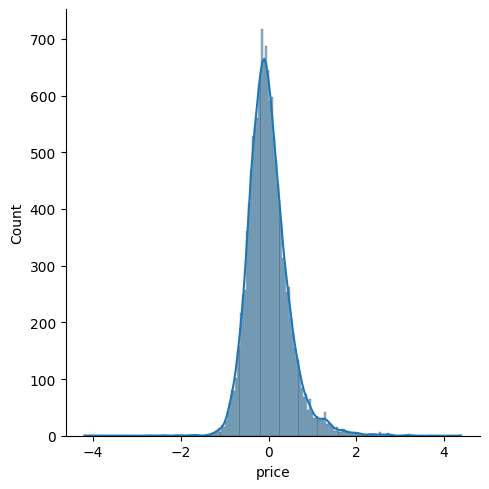

In [86]:
sns.displot(y_test - prediction, kde=True)


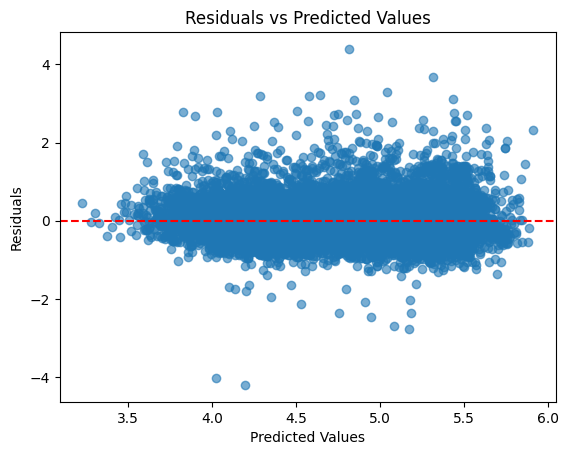

In [87]:
import matplotlib.pyplot as plt
plt.scatter(prediction, y_test - prediction, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


Now we will be using the kernels from support Vector Machines

In [88]:
from sklearn.svm import SVR

model = SVR(
    kernel='rbf',
    C=1.0,
    epsilon=0.1,
    gamma='scale',
    degree=3
)


In [89]:
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [90]:
svr_prediction = model.predict(X_test)

svr_score = r2_score(y_test, svr_prediction)
svr_mse = mean_squared_error(y_test, svr_prediction)

In [91]:
svr_score, svr_mse

(0.5890586643010689, 0.19422201302938336)

In [92]:
from sklearn.svm import NuSVR

model = NuSVR(kernel='rbf', C=1.0, nu=0.5, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))


0.5925231148730287 0.19258461979177588


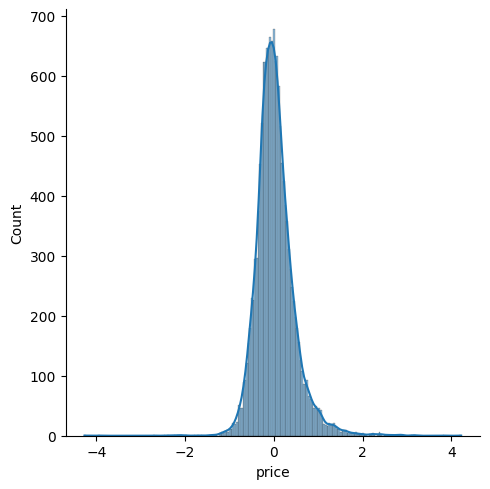

In [93]:
sns.displot(y_test - y_pred, kde=True)


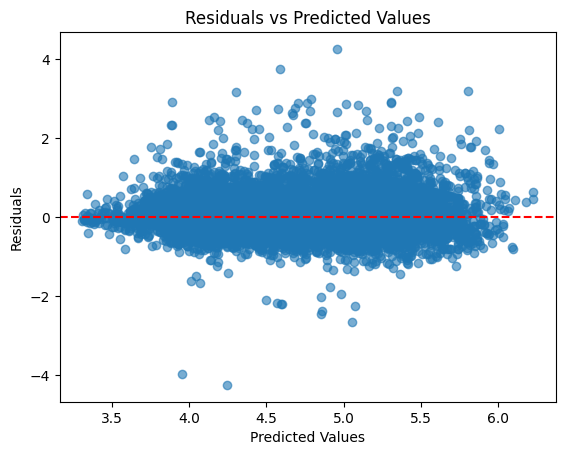

In [94]:
import matplotlib.pyplot as plt
plt.scatter(svr_prediction, y_test - svr_prediction, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model_rf = rf.fit(X_train, y_train)
train_rf_predict = model.predict(X_train)

predict_rf = rf.predict(X_test)
rf_score = r2_score(y_test, predict_rf)
rf_mse = mean_squared_error(y_test, predict_rf)


In [96]:
print(f"Metrics: \n r2_score : {rf_score} \n mean_squared_error: {rf_mse}")

Metrics: 
 r2_score : 0.5982337899365562 
 mean_squared_error: 0.18988559997983948


In [97]:

rf_score1 = r2_score(y_train, train_rf_predict)
rf_mse1 = mean_squared_error(y_train, train_rf_predict)


In [98]:
rf_score, rf_mse

(0.5982337899365562, 0.18988559997983948)

# Now implementing the `Random Forest` algorithms which is non paramteric algorithms, which doesnot has paramters.


In [99]:

from sklearn.tree import DecisionTreeRegressor

dt_estimator = DecisionTreeRegressor()

In [100]:
dt_estimator

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [101]:
X.columns
# Log-transform target to reduce skew
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [102]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=12,
    subsample=1,
    colsample_bytree=0.9,
    gamma=0,          # Min loss reduction to make a split
    reg_alpha=0.09,       # L1 regularization
    reg_lambda=0.7,      # L2 regularization
    random_state=32,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_pred_xgb = xgb.predict(X_test)


In [103]:
r21 = r2_score(y_test_log, y_pred_xgb)
print(r21)

mse = mean_squared_error(y_test_log, y_pred_xgb)

0.6234071480736472


In [104]:
mse

0.005395562851075035

In [113]:
read_dataframe.select_dtypes(exclude = 'object').columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [114]:
read_dataframe.select_dtypes(exclude = 'number' ).columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [14]:
import os
os.getcwd()

'/Users/govindapandey/Desktop/MLOPS/notebook/EDA'

In [31]:
import os
import pandas as pd

file_path = os.path.join("../../", "artifacts", "train_featured_df.csv")
read_csv_train = pd.read_csv(file_path)

file_path = os.path.join("../../", "artifacts", "test_featured_df.csv")
read_csv_test = pd.read_csv(file_path)



In [33]:
read_csv_test.shape+read_csv_train.shape

(14669, 12, 34226, 12)

In [22]:
read_csv.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'last_review_day',
       'neighbourhood_freq', 'price_log', 'minimum_nights_log'],
      dtype='object')

In [23]:
read_csv.head(10)

,neighbourhood_group,latitude,longitude,room_type,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,neighbourhood_freq,price_log,minimum_nights_log
0,Queens,40.69206,-73.74546,Entire home/apt,65,2.33,1,263,26.0,0.000497,5.135798,1.098612
1,Brooklyn,40.66060,-73.99455,Entire home/apt,24,1.15,1,12,23.0,0.007743,4.553877,1.098612
2,Manhattan,40.74227,-73.97432,Private room,2,0.07,1,0,16.0,0.009788,4.615121,1.791759
3,Brooklyn,40.68676,-73.94593,Private room,4,2.86,3,0,23.0,0.076316,3.951244,0.693147
4,Manhattan,40.76013,-73.96566,Shared room,6,0.24,1,0,8.0,0.032110,4.605170,1.386294
5,Brooklyn,40.67791,-74.00720,Private room,5,0.10,1,0,22.0,0.001636,4.025352,1.791759
6,Manhattan,40.72834,-73.97907,Entire home/apt,0,0.00,1,119,0.0,0.038333,5.993961,3.433987
7,Manhattan,40.76207,-73.98935,Entire home/apt,51,7.50,1,25,5.0,0.040057,5.081404,0.693147
8,Brooklyn,40.68409,-73.96467,Private room,2,0.88,1,89,6.0,0.011804,4.262680,2.079442
9,Manhattan,40.72669,-73.98419,Entire home/apt,179,2.99,1,179,8.0,0.038333,4.867534,1.098612


In [24]:
read_csv.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_day                   0
neighbourhood_freq                0
price_log                         0
minimum_nights_log                0
dtype: int64

In [25]:
read_csv.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'last_review_day',
       'neighbourhood_freq', 'price_log', 'minimum_nights_log'],
      dtype='object')

In [26]:
read_csv.select_dtypes( include ='number').columns

Index(['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'last_review_day',
       'neighbourhood_freq', 'price_log', 'minimum_nights_log'],
      dtype='object')

In [27]:
read_csv.select_dtypes(exclude = 'number').columns

Index(['neighbourhood_group', 'room_type'], dtype='object')

In [28]:
read_csv.shape

(34226, 12)